# Custom Functions

In [330]:
# filter timestamp
def filter_time(df_column, time_range):
    # filter rentang dini hari
    if "dini hari" in time_range.lower():
        start = pd.Timestamp('00:00:00').time()
        end = pd.Timestamp('04:59:00').time()
        mask = (df_column >= start) & (df_column <= end)
        return df.loc[mask]
    
    # filter rentang pagi
    if "pagi" in time_range.lower():
        start = pd.Timestamp('05:00:00').time()
        end = pd.Timestamp('10:59:00').time()
        mask = (df_column >= start) & (df_column <= end)
        return df.loc[mask]

    # filter rentang siang
    if "siang" in time_range.lower():
        start = pd.Timestamp('11:00:00').time()
        end = pd.Timestamp('14:59:00').time()
        mask = (df_column >= start) & (df_column <= end)
        return df.loc[mask]

    # filter rentang sore
    if "sore" in time_range.lower():
        start = pd.Timestamp('15:00:00').time()
        end = pd.Timestamp('17:59:00').time()
        mask = (df_column >= start) & (df_column <= end)
        return df.loc[mask]

    # filter rentang malam
    if "malam" in time_range.lower():
        start = pd.Timestamp('18:00:00').time()
        end = pd.Timestamp('23:59:00').time()
        mask = (df_column >= start) & (df_column <= end)
        return df.loc[mask]

# bar graph frekuensi rentang waktu
def plot_waktu(df_column, time_range):
    dini_hari = ["12 AM", "1 AM", "2 AM", "3 AM", "4 AM"]
    pagi = ["5 AM", "6 AM", "7 AM", "8 AM", "9 AM", "10 AM"]
    siang = ["11 AM", "12 PM", "1 PM", "2 PM"]
    sore = ["3 PM", "4 PM", "5 PM"]
    malam = ["6 PM", "7 PM", "8 PM", "9 PM", "10 PM", "11 PM"]
    
    fig, ax = plt.subplots(figsize=(10, 6))

    if "dini" in time_range.lower():
        xticks = dini_hari
        ax.set_title('Waktu Dini Hari')

    elif "pagi" in time_range.lower():
        xticks = pagi
        ax.set_title('Waktu Pagi Hari')

    elif "siang" in time_range.lower():
        xticks = siang
        ax.set_title('Waktu Siang Hari')

    elif "sore" in time_range.lower():
        xticks = sore
        ax.set_title('Waktu Sore Hari')

    elif "malam" in time_range.lower():
        xticks = malam
        ax.set_title('Waktu Malam Hari')

    else:
        print("Rentang Waktu Tidak Ada!!!")
    
    
    x_value = df_column.value_counts().sort_index().index
    y_value = df_column.value_counts().sort_index().values
        
    color = plt.cm.Set3(np.arange(len(x_value)))
    bars = ax.bar(x_value, y_value, tick_label=xticks, color=color)
    ax.bar_label(bars)

    ax.set_ylabel('Jumlah Posting')
    ax.set_xlabel('Waktu Posting')
        
    plt.show()

# Import Libraries & Dataset

In [414]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [319]:
df = pd.read_csv("dataset/pse_isr_reddit_comments.csv")
df.head()

,comment_id,score,self_text,subreddit,created_time
0,k5480sx,1,Exactly! I can remember the humanitarian aid s...,worldnews,2023-10-16 19:39:01
1,k547q14,1,*We are the only part of the World that has Fr...,Palestine,2023-10-16 19:36:58
2,k547elf,1,"I don’t make Israeli strategy, nor am I Israel...",worldnews,2023-10-16 19:34:47
3,k54742r,1,These people didn't vote Hamas in or something...,worldnews,2023-10-16 19:32:44
4,k5473zi,1,We don't care what you do. We just want to liv...,worldnews,2023-10-16 19:32:43


In [320]:
# remove unused columns for analysis
df = df.loc[:, ~df.columns.isin(['comment_id', 'score', 'self_text'])]
df.head()

,subreddit,created_time
0,worldnews,2023-10-16 19:39:01
1,Palestine,2023-10-16 19:36:58
2,worldnews,2023-10-16 19:34:47
3,worldnews,2023-10-16 19:32:44
4,worldnews,2023-10-16 19:32:43


# Data Understanding

- **comment_id**: Unique identifier for each comment. (type:str)
- **score**: The score or upvotes received by the comment. (type:int)
- **self_text**: The actual text content of the comment. (type:str)
- **subreddit**: The subreddit where the comment was posted. (type:str)
- **created_time**: The timestamp when the comment was created. (type:datetime)

# EDA

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189631 entries, 0 to 189630
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   subreddit     189631 non-null  object
 1   created_time  189631 non-null  object
dtypes: object(2)
memory usage: 2.9+ MB


## subreddit

In [300]:
df["subreddit"].value_counts()

subreddit
IsraelPalestine          52622
worldnews                36204
AskMiddleEast            28107
CombatFootage            27901
PublicFreakout           14255
NonCredibleDefense       13865
Palestine                 6968
worldnewsvideo            5598
IsrealPalestineWar_23     2537
TerrifyingAsFuck           546
NoahGetTheBoat             498
AbruptChaos                200
CrazyFuckingVideos         197
ActualPublicFreakouts      133
Name: count, dtype: int64

In [301]:
# df["subreddit"].value_counts(ascending=True).plot.barh(xlabel='Jumlah Posting')

Text(0.5, 0, 'Jumlah Posting')

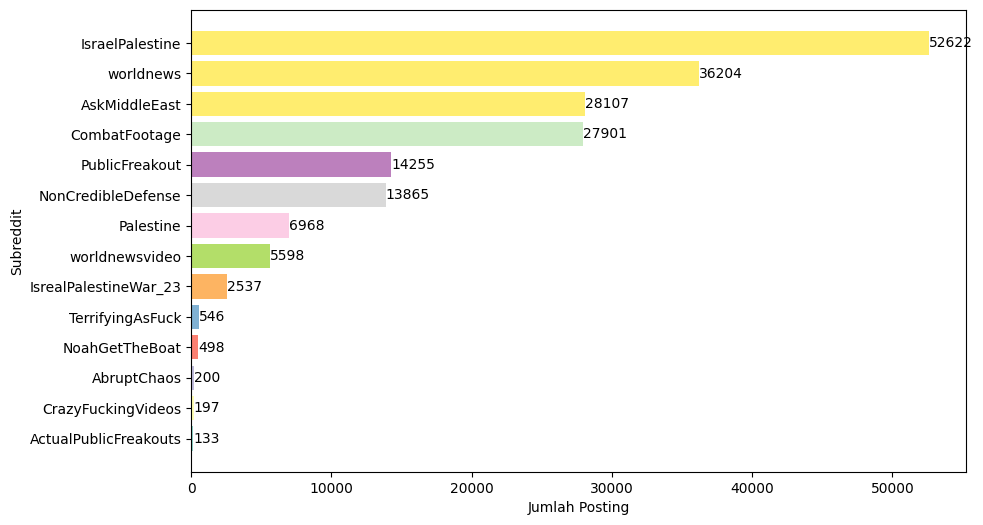

In [302]:
fig, ax = plt.subplots(figsize=(10, 6))

x_value = df["subreddit"].value_counts(ascending=True).index
y_value = df["subreddit"].value_counts(ascending=True).values

color = plt.cm.Set3(np.arange(len(x_value)))
        
bars = ax.barh(x_value, y_value, color=color)
ax.bar_label(bars)

ax.set_ylabel('Subreddit')
ax.set_xlabel('Jumlah Posting')

## created_time

### filter rentang waktu

**Rentang Waktu**
- Dini Hari: 00:00 - 04:59
- Pagi     : 05:00 - 10:59
- Siang    : 11:00 - 14:59
- Sore     : 15:00 - 17:59
- Malam    : 18:00 - 23:59

In [331]:
# create a new column with only timestamp format
df["time_only"] = pd.to_datetime(df["created_time"]).dt.time
df[["time_only"]].head()

,time_only
0,19:39:01
1,19:36:58
2,19:34:47
3,19:32:44
4,19:32:43


In [322]:
# create a new column with only hour format
df["hour_only"] = pd.to_datetime(df["created_time"]).dt.hour
df[["hour_only"]].head()

,hour_only
0,19
1,19
2,19
3,19
4,19


In [332]:
# filter rentang waktu
dini_hari = filter_time(df["time_only"], "dini hari")
pagi = filter_time(df["time_only"], "pagi")
siang = filter_time(df["time_only"], "siang")
sore = filter_time(df["time_only"], "sore")
malam = filter_time(df["time_only"], "malam")

### Dini Hari

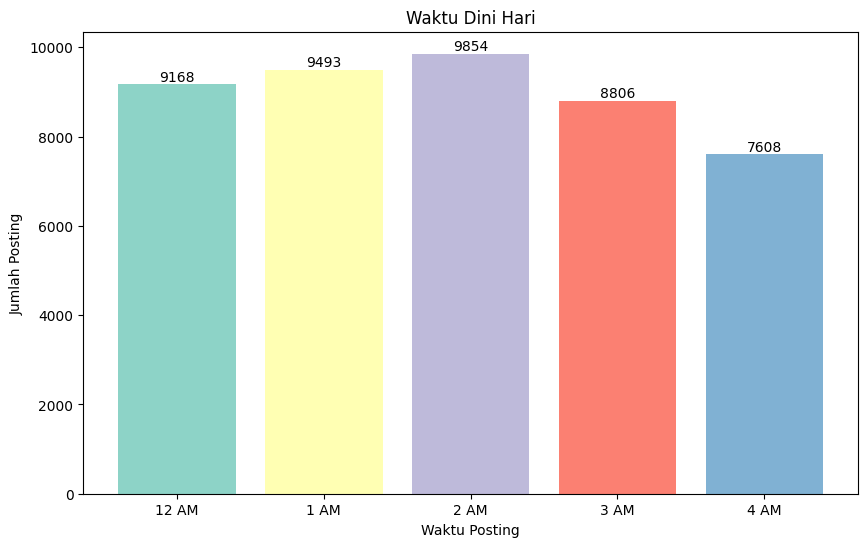

In [333]:
plot_waktu(dini_hari["hour_only"], "dini hari")

### Pagi Hari

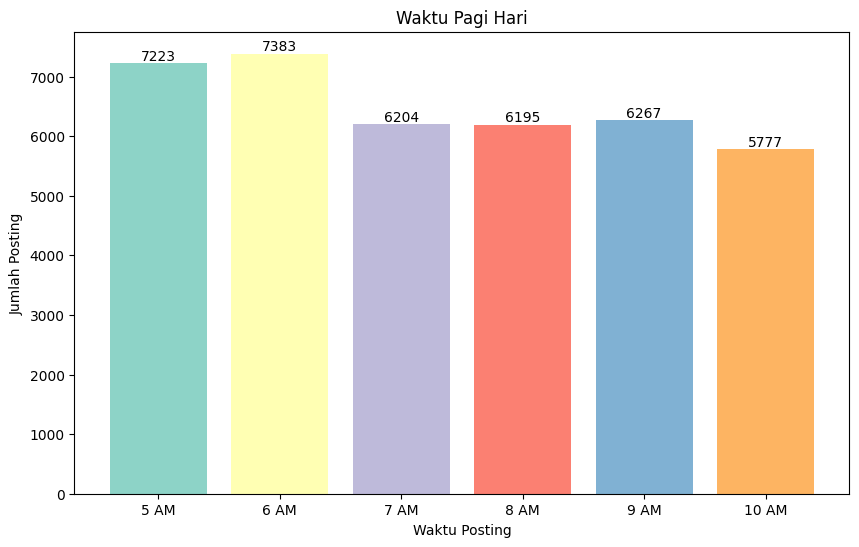

In [334]:
plot_waktu(pagi["hour_only"], "pagi")

### Siang Hari

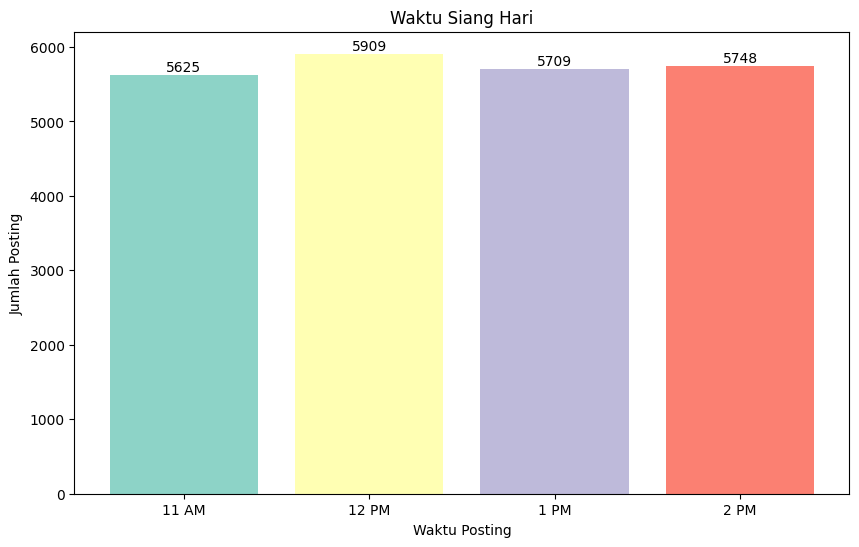

In [252]:
plot_waktu(siang["hour_only"], "siang")

### Sore Hari

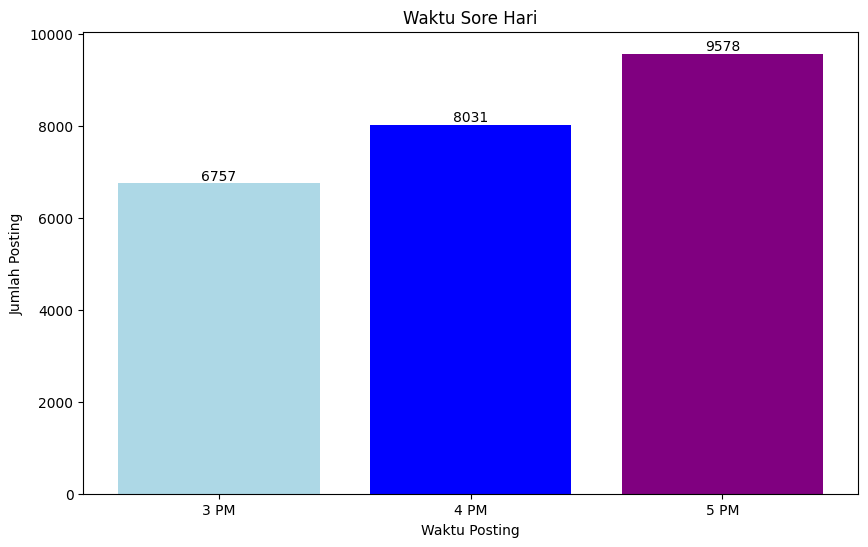

In [240]:
plot_waktu(sore["hour_only"], "sore")

### Malam Hari

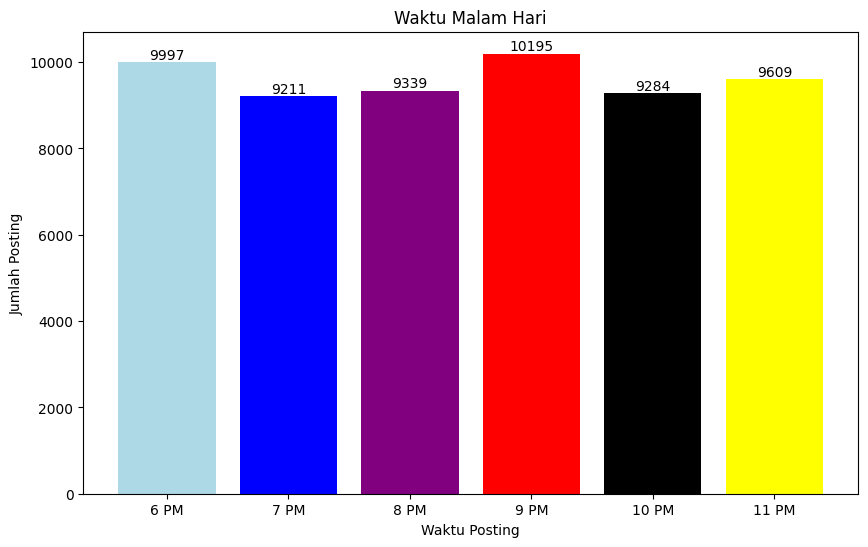

In [241]:
plot_waktu(malam["hour_only"], "malam")

# grouped

### grup rentang waktu

In [522]:
rentang_waktu = ['Dini Hari', 'Pagi Hari', 'Siang Hari', 'Sore Hari', 'Malam Hari']

for rt in rentang_waktu:
    filter = filter_time(df["time_only"], rt)
    df.loc[df.index.isin(filter.index), 'rentang_waktu'] = rt

df.head()

,subreddit,created_time,time_only,hour_only,rentang_waktu
0,worldnews,2023-10-16 19:39:01,19:39:01,19,Malam Hari
1,Palestine,2023-10-16 19:36:58,19:36:58,19,Malam Hari
2,worldnews,2023-10-16 19:34:47,19:34:47,19,Malam Hari
3,worldnews,2023-10-16 19:32:44,19:32:44,19,Malam Hari
4,worldnews,2023-10-16 19:32:43,19:32:43,19,Malam Hari


In [523]:
df_grouped = df.groupby("rentang_waktu", group_keys=True, sort=False)[['subreddit']].apply(lambda x: x.value_counts())
df_grouped

rentang_waktu  subreddit            
Malam Hari     IsraelPalestine          13953
               worldnews                12266
               CombatFootage             9144
               AskMiddleEast             8814
               PublicFreakout            4445
               NonCredibleDefense        3852
               Palestine                 2150
               worldnewsvideo            1662
               IsrealPalestineWar_23      723
               TerrifyingAsFuck           275
               NoahGetTheBoat             138
               ActualPublicFreakouts      104
               CrazyFuckingVideos          59
               AbruptChaos                 50
Sore Hari      IsraelPalestine           6363
               worldnews                 5184
               AskMiddleEast             4022
               CombatFootage             3480
               NonCredibleDefense        1998
               PublicFreakout            1580
               Palestine                  8

### plot

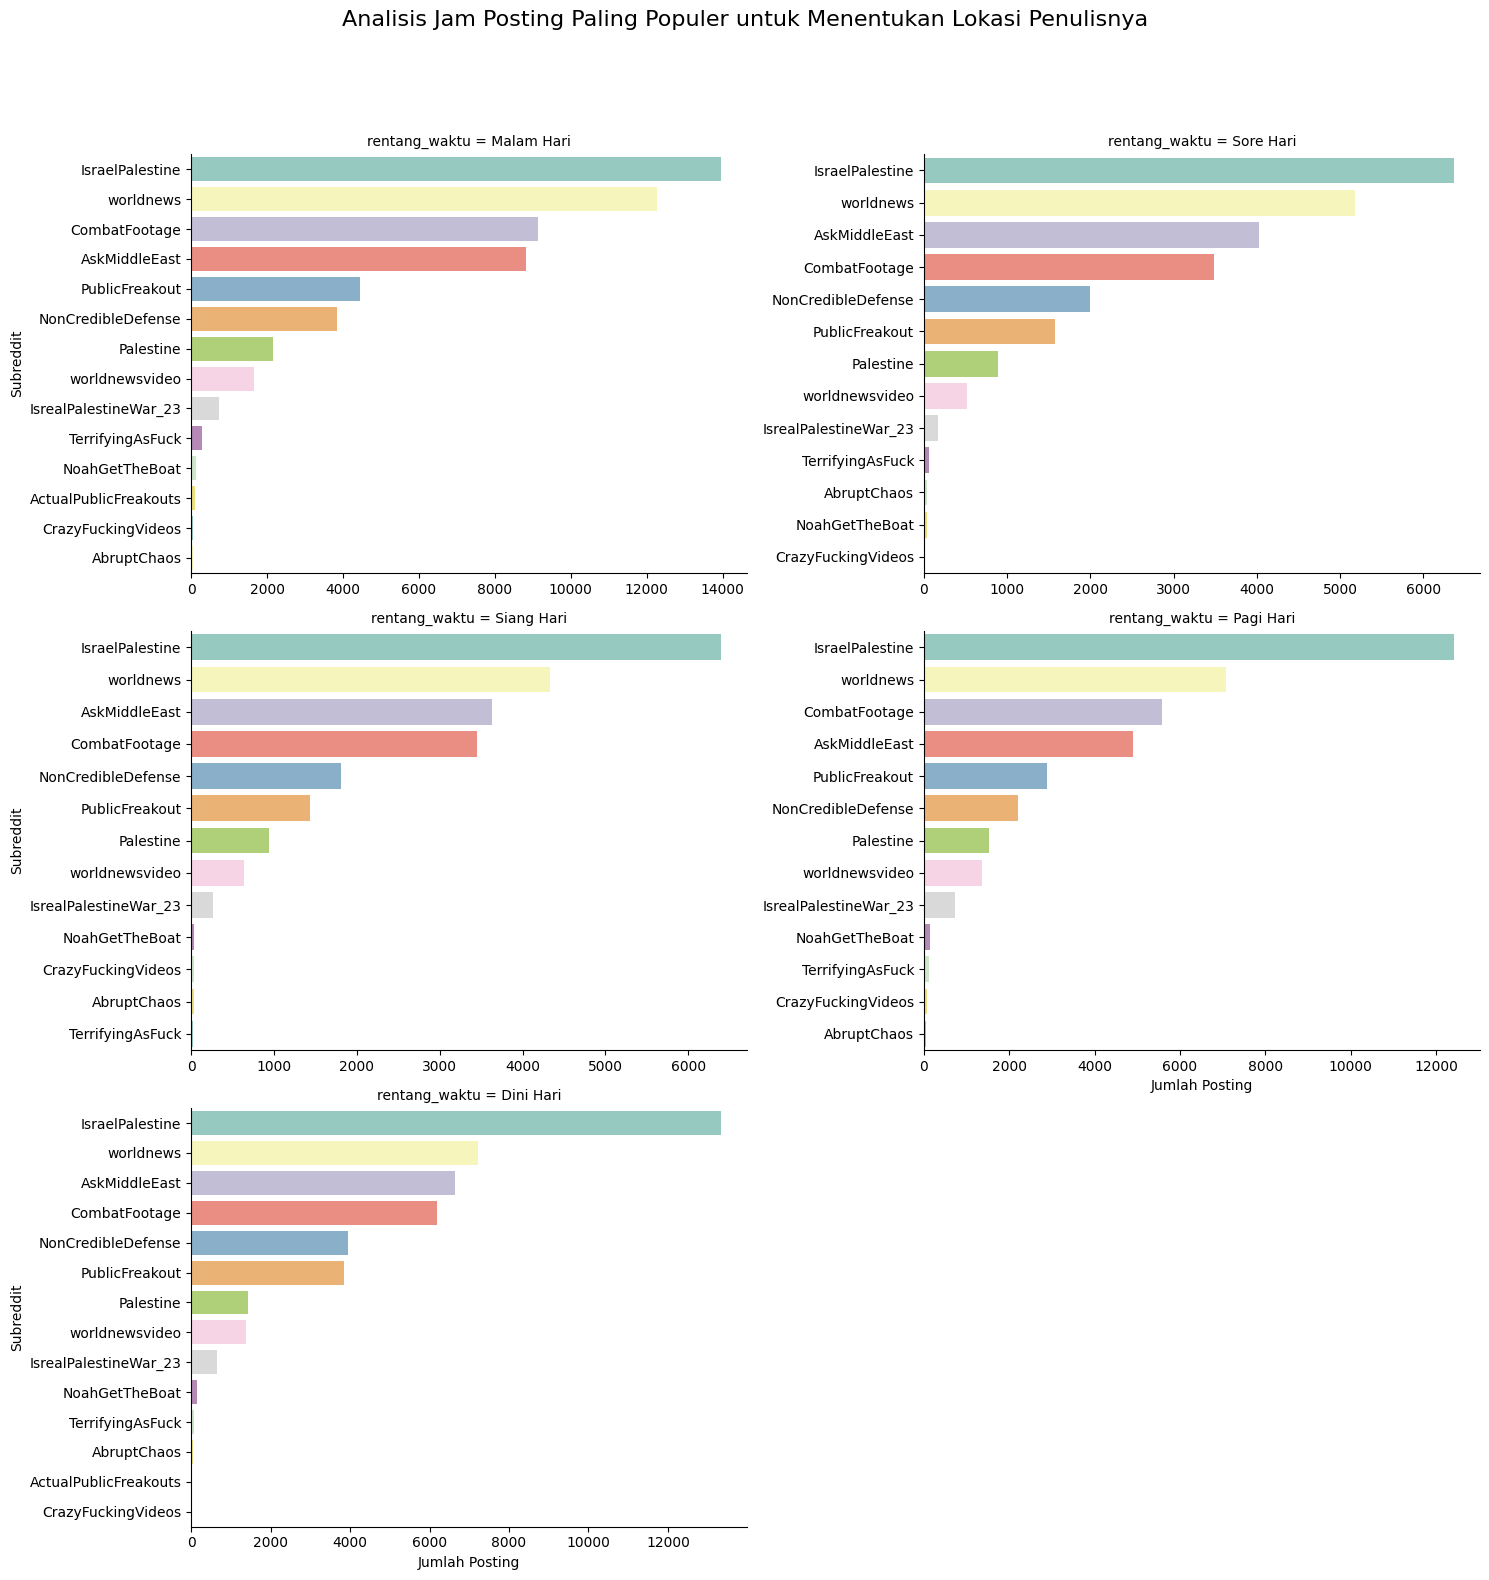

In [524]:
df_grouped = df.groupby("rentang_waktu", group_keys=True, sort=False)[['subreddit']].apply(lambda x: x.value_counts())
df_grouped = df_grouped.reset_index()

g = sns.FacetGrid(df_grouped, col='rentang_waktu', col_wrap=2, height=5, aspect=1.5, sharey=False, sharex=False)

g.map_dataframe(sns.barplot, y='subreddit', x='count', palette='Set3', hue='subreddit')

g.set_axis_labels('Jumlah Posting', 'Subreddit')
g.fig.suptitle('Analisis Jam Posting Paling Populer untuk Menentukan Lokasi Penulisnya', y=1.05, fontsize=16)

plt.tight_layout()
plt.show()

In [507]:
# df_grouped = df_grouped.reset_index()

# f, ax = plt.subplots(figsize=(14, 8))

# sns.barplot(data=df_grouped, x='rentang_waktu', y='subreddit', hue='subreddit')

# ax.set(title='Subreddit Counts by Rentang Waktu', xlabel='Rentang Waktu', ylabel='Count')
# ax.legend(title='Subreddit', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.tight_layout()
# plt.show()